In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from IPython import display
#from bertviz import head_view
from transformers import AutoModel, AutoTokenizer
import torch

/Users/Emma/Desktop/capstone/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
model_name = "ckiplab/gpt2-base-chinese" #"hfl/chinese-bert-wwm" #"bert-base-chinese"
from transformers import AutoTokenizer, AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

inputs = tokenizer("我们喝了柠檬水,很高兴", return_tensors="pt")
outputs = model(**inputs)

['0 我', '1 们', '2 喝', '3 了', '4 柠', '5 檬', '6 水', '7 很', '8 高', '9 兴']


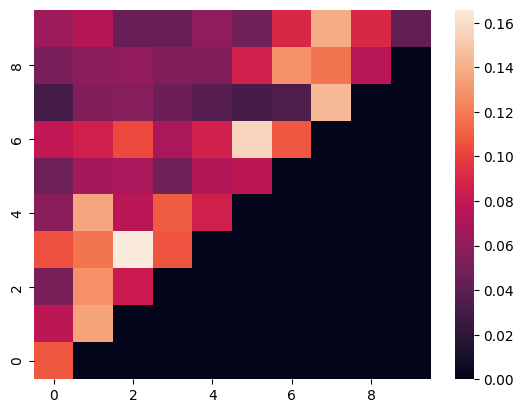

In [43]:
layer = 0
head = 0

attention_matrix = torch.stack(outputs.attentions).cpu()[layer][0][head].detach().numpy()
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
#remove punctuation, CLS & SEP
punct_idxs = [idx for idx, token in enumerate(tokens) if token in [",", "[CLS]", "[SEP]"]]
tokens = [token for i, token in enumerate(tokens) if i not in punct_idxs]
attention_matrix = np.delete(attention_matrix, punct_idxs, axis = 1)
attention_matrix = np.delete(attention_matrix, punct_idxs, axis = 0)
#attention_matrix = attention_matrix[::-1]
#print(len(attention_matrix))
#sns.heatmap(attention_matrix, xticklabels=tokens, yticklabels=tokens[::-1])
figure = sns.heatmap(attention_matrix, xticklabels=2, yticklabels=2)
print([str(i) + " " + token for i, token in enumerate(tokens)])
figure.invert_yaxis()
plt.show()

In [35]:
print(torch.stack(outputs.attentions).cpu()[layer].size())

torch.Size([1, 12, 26, 26])


<Axes: >

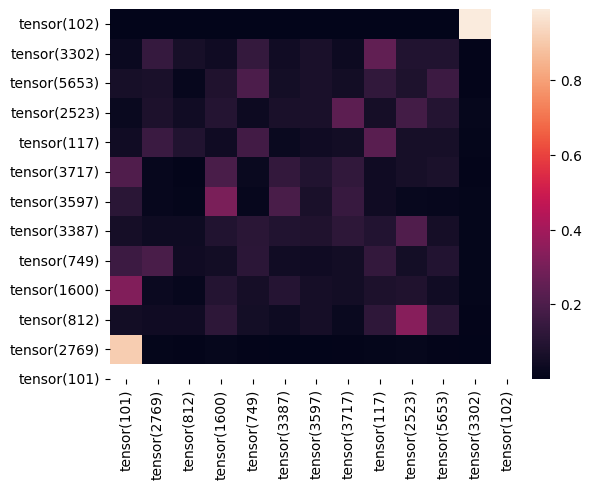

In [18]:
sns.heatmap(attention_matrix, xticklabels=inputs["input_ids"][0], yticklabels=list(inputs["input_ids"][0])[::-1])